# 1

In [3]:
using VMLS

D = house_sales_data();  # creates 3 vectors: area, beds, price
# area = D["area"];
# beds = D["beds"];
# price = D["price"];
# m = length(price);
# A = [ones(m) area beds ];  # intercept, area, beds
# x = A \ price              # data \ target variable
# rms_error = rms(price - A*x)
# std_prices = stdev(price)

In [4]:
D

Dict{String, Vector{T} where T} with 6 entries:
  "baths"    => [2, 2, 2, 2, 1, 2, 2, 1, 1, 1  …  2, 2, 2, 2, 2, 3, 2, 2, 2, 2]
  "location" => [2, 2, 2, 3, 3, 2, 2, 2, 2, 2  …  3, 4, 3, 3, 3, 3, 3, 2, 3, 4]
  "price"    => [94.905, 98.937, 100.309, 106.25, 107.502, 108.75, 110.7, 113.2…
  "beds"     => [2, 3, 3, 3, 3, 2, 2, 2, 2, 2  …  3, 3, 4, 4, 3, 4, 3, 3, 4, 3]
  "area"     => [0.941, 1.146, 0.909, 1.289, 1.02, 1.022, 1.134, 0.844, 0.795, …
  "condo"    => [1, 0, 0, 0, 0, 0, 1, 0, 1, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [5]:
length(D["location"])

774

In [6]:
using VMLS

D = house_sales_data();
price = D["price"];
area = D["area"];
beds = D["beds"];
location = D["location"];
location1 = []
location2 = []
location3 = []

for i in D["location"]

    if i == 1
        append!(location1, 1)
        append!(location2, 0)
        append!(location3, 0)
    elseif i == 2
        append!(location1, 0)
        append!(location2, 1)
        append!(location3, 0)
    elseif i == 3
        append!(location1, 0)
        append!(location2, 0)
        append!(location3, 1)
    else
        append!(location1, 0)
        append!(location2, 0)
        append!(location3, 0)
    end

end

In [7]:
using LinearAlgebra

A = [vandermonde(area, 3) beds location1 location2 location3]
A = convert(Matrix{Float64}, A)
B = A \ price

7-element Vector{Float64}:
  76.32921595922653
 195.53184347837174
 -12.755474952829356
 -16.059942082519566
  27.798103881489894
 -75.07982512631612
 -82.21351116253757

a. 係數分別是  76.32921595922653, 195.53184347837174, -12.755474952829356, -16.059942082519566, 27.798103881489894, -75.07982512631612, -82.21351116253757
代表截距為76.33, area每增加1，price就增加195.5，area^2每增加1，price就減少12.755，beds每增加1，price就減少16.06，是location1就增加27.8，是location2就減少75.08，是location3就減少82.2

In [8]:
[vandermonde(1.01, 3) 4 0 0 0]*B

1-element Vector{Float64}:
 196.56474954292247

b. The predicted house price would be 196.56

In [9]:
function polyfit(area, beds, location)

    a = 0; b = 0; c = 0;
    if location == 1
        a = 1
    elseif location == 2
        b = 1
    elseif location == 3
        c = 1
    end
    
    return([vandermonde(area, 3) beds a b c]*B)

end

polyfit (generic function with 1 method)

In [10]:
polyfit(1.01, 4, 4)

1-element Vector{Float64}:
 196.56474954292247

In [11]:
y_hat = []

for i in 1:length(D["location"])
    append!(y_hat, polyfit(D["area"][i], D["beds"][i], D["location"][i]))
end


(process:1992): GLib-GIO-WARNING **: 22:24:37.520: Unexpectedly, UWP app `Evernote.Evernote_10.27.5.0_x86__q4d96b2w5wcc2' (AUMId `Evernote.Evernote_q4d96b2w5wcc2!Evernote') supports 1 extensions but has no verbs


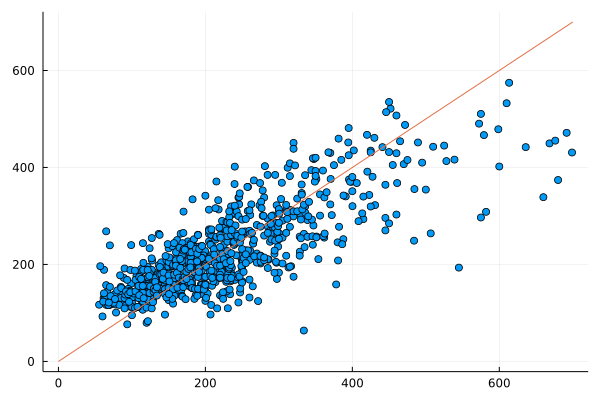

In [12]:
# c

using Plots
scatter(price, y_hat, legend=false)
plot!([0:700], [0:700])

# 2

In [13]:
N = length(price);
nfold = div(N,5) # 5 randomly chosen folds
X = hcat(ones(N), area, area.^2, beds, location .== 1, location .== 2,  location .== 3 );

import Random;
I = Random.randperm(N);
models = zeros(7,5);  # store 7 coefficients for the 5 models
errors = zeros(2,5);  # prediction errors

In [14]:
theta_all = []
for k = 1:5
    if k == 1
        Itrain = I[nfold+1:end]; # seperate the training set and 
        Itest = I[1:nfold];
    elseif k == 5
        Itrain = I[1:4*nfold];
        Itest = I[4*nfold+1:end];
    else
        Itrain = I[ [1:(k-1)*nfold ; k*nfold+1 : N]]
        Itest = I[ [(k-1)*nfold+1 ; k*nfold ]];
    end;
    Ntrain = length(Itrain)
    Ntest = length(Itest)
    theta = X[Itrain,:] \ price[Itrain];
    append!(theta_all, [theta])
    errors[1,k] = rms(X[Itrain,:] * theta - price[Itrain]);  # training set
    errors[2,k] = rms(X[Itest,:] * theta - price[Itest]);    # testing set
    models[:,k] = theta;
end;

In [15]:
theta_all

5-element Vector{Any}:
 [84.5867931990245, 206.05724521527532, -14.221017123028071, -21.702266069526114, 23.516936508253547, -76.53446882869004, -82.35766440389429]
 [67.51427193899437, 197.66021467258392, -14.126927007710801, -13.870605931357016, 19.045613161465223, -74.75067136344732, -81.65544197211383]
 [65.64779399374648, 191.0343455789342, -10.803992186609204, -13.88192922043667, 41.15660267339191, -70.76745369356232, -75.55155786812793]
 [78.58845266873904, 204.9034087075464, -14.846041393849418, -17.287027565578757, 25.000759164706395, -81.3756167197055, -88.29871516614314]
 [87.54254556976501, 175.38607342553573, -9.429654524039414, -12.962399675603299, 29.163307792477145, -73.12770512361465, -84.46528724585072]

In [16]:
# a

for i in 1:5
    println("The coefficients of the " * string(i) * " fold would be " * string(theta_all[i]))
end

The coefficients of the 1 fold would be [84.5867931990245, 206.05724521527532, -14.221017123028071, -21.702266069526114, 23.516936508253547, -76.53446882869004, -82.35766440389429]
The coefficients of the 2 fold would be [67.51427193899437, 197.66021467258392, -14.126927007710801, -13.870605931357016, 19.045613161465223, -74.75067136344732, -81.65544197211383]
The coefficients of the 3 fold would be [65.64779399374648, 191.0343455789342, -10.803992186609204, -13.88192922043667, 41.15660267339191, -70.76745369356232, -75.55155786812793]
The coefficients of the 4 fold would be [78.58845266873904, 204.9034087075464, -14.846041393849418, -17.287027565578757, 25.000759164706395, -81.3756167197055, -88.29871516614314]
The coefficients of the 5 fold would be [87.54254556976501, 175.38607342553573, -9.429654524039414, -12.962399675603299, 29.163307792477145, -73.12770512361465, -84.46528724585072]


In [17]:
# import Pkg; Pkg.add("DataFrames")
using DataFrames
df = DataFrame(fold1 = models[:,1], fold2 = models[:,2], fold3 = models[:,3], fold4 = models[:,4], fold5 = models[:,5])

,fold1,fold2,fold3,fold4,fold5
,Float64,Float64,Float64,Float64,Float64
1,84.5868,67.5143,65.6478,78.5885,87.5425
2,206.057,197.66,191.034,204.903,175.386
3,-14.221,-14.1269,-10.804,-14.846,-9.42965
4,-21.7023,-13.8706,-13.8819,-17.287,-12.9624
5,23.5169,19.0456,41.1566,25.0008,29.1633
6,-76.5345,-74.7507,-70.7675,-81.3756,-73.1277
7,-82.3577,-81.6554,-75.5516,-88.2987,-84.4653


### b
### Training errors would be the first row below.
### Testing errors would be the second row below.

In [18]:
errors # for training and testing for all the 5 model folds

2×5 Matrix{Float64}:
 68.0381  66.0635  67.8937  71.2207  68.4287
 70.5065  94.7738  41.0997  57.0858  69.0783

# 3

In [19]:
using VMLS

IRIS = iris_data();

In [20]:
IRIS

Dict{String, Matrix{Float64}} with 3 entries:
  "virginica"  => [6.3 3.3 6.0 2.5; 5.8 2.7 5.1 1.9; … ; 6.2 3.4 5.4 2.3; 5.9 3…
  "setosa"     => [5.1 3.5 1.4 0.2; 4.9 3.0 1.4 0.2; … ; 5.3 3.7 1.5 0.2; 5.0 3…
  "versicolor" => [7.0 3.2 4.7 1.4; 6.4 3.2 4.5 1.5; … ; 5.1 2.5 3.0 1.1; 5.7 2…

In [21]:
iris = vcat(IRIS["setosa"], IRIS["versicolor"], IRIS["virginica"]);

In [22]:
K = 3;
Y = [ones(50) zeros(50) zeros(50);
        zeros(50) ones(50) zeros(50);
        zeros(50) zeros(50) ones(50)]
2*Y .- 1

150×3 Matrix{Float64}:
  1.0  -1.0  -1.0
  1.0  -1.0  -1.0
  1.0  -1.0  -1.0
  1.0  -1.0  -1.0
  1.0  -1.0  -1.0
  1.0  -1.0  -1.0
  1.0  -1.0  -1.0
  1.0  -1.0  -1.0
  1.0  -1.0  -1.0
  1.0  -1.0  -1.0
  1.0  -1.0  -1.0
  1.0  -1.0  -1.0
  1.0  -1.0  -1.0
  ⋮          
 -1.0  -1.0   1.0
 -1.0  -1.0   1.0
 -1.0  -1.0   1.0
 -1.0  -1.0   1.0
 -1.0  -1.0   1.0
 -1.0  -1.0   1.0
 -1.0  -1.0   1.0
 -1.0  -1.0   1.0
 -1.0  -1.0   1.0
 -1.0  -1.0   1.0
 -1.0  -1.0   1.0
 -1.0  -1.0   1.0

In [23]:
# a

function ls_multiclass(iris,Y,K)
    n, N = size(iris)
    Theta = iris \ (2*Y .- 1)
    yhat = row_argmax(iris*Theta)
    return Theta, yhat
end

ls_multiclass (generic function with 1 method)

In [24]:
Theta, yhat = ls_multiclass(iris,Y,K)

([0.01982338693216028 0.27633014258952865 -0.4431452541746745; 0.4180698209954974 -0.70044814040452 0.19381103597593863; -0.433863430480156 0.3977490372905345 0.05634976294472916; -0.07592917262042764 -1.0986848525146933 1.2257122768050859], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [25]:
println("The coefficients are " * string(Theta))

The coefficients are [0.01982338693216028 0.27633014258952865 -0.4431452541746745; 0.4180698209954974 -0.70044814040452 0.19381103597593863; -0.433863430480156 0.3977490372905345 0.05634976294472916; -0.07592917262042764 -1.0986848525146933 1.2257122768050859]


In [26]:
function confusion_matrix(y, yhat, K)
    C = zeros(K,K)
    for i in 1:K 
        for j in 1:K
            C[i,j] = sum((y .== i) .& (yhat .== j))
        end 
    end
    return C
end;

In [27]:
# b

Ctrain = confusion_matrix(vcat(ones(50), ones(50)+ones(50), ones(50)+ones(50)+ones(50)) , yhat, 3)

3×3 Matrix{Float64}:
 50.0   0.0   0.0
  1.0  34.0  15.0
  0.0  11.0  39.0

# 4

In [54]:
# import time series of temperatures t
t = temperature_data();
N = length(t)

744

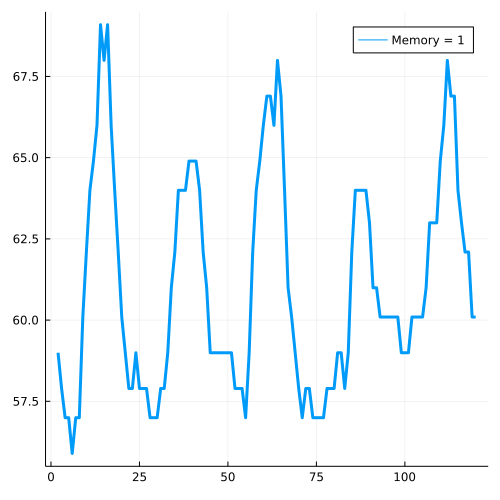

In [55]:
M = 1
y = t[M+1:end];
A = hcat( [ t[i:i+N-M-1] for i = M:-1:1]...);
theta = A \ y;
ypred = A * theta;
 # RMS error of LS AR fit
rms(ypred - y)
# Plot first five days
Nplot = 24*5
plot(M+1:Nplot, ypred[1:Nplot-M], size = (500, 500), linewidth = 3, label="Memory = 1")

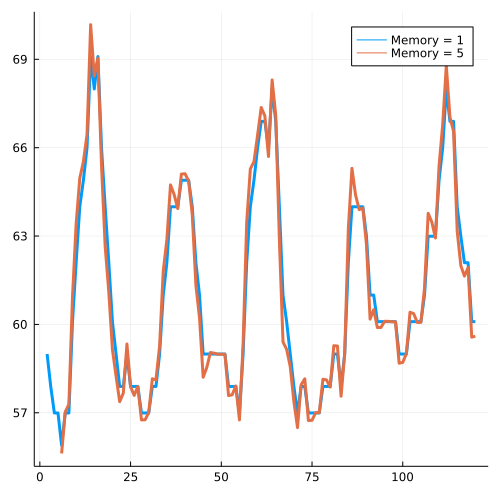

In [56]:
M = 5
y = t[M+1:end];
A = hcat( [ t[i:i+N-M-1] for i = M:-1:1]...);
theta = A \ y;
ypred = A * theta;
 # RMS error of LS AR fit
rms(ypred - y)
# Plot first five days
Nplot = 24*5
plot!(M+1:Nplot, ypred[1:Nplot-M], size = (500, 500), linewidth = 3, label="Memory = 5")

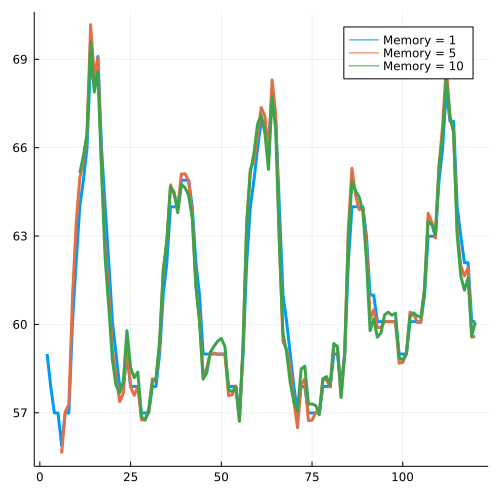

In [57]:
M = 10
y = t[M+1:end];
A = hcat( [ t[i:i+N-M-1] for i = M:-1:1]...);
theta = A \ y;
ypred = A * theta;
 # RMS error of LS AR fit
rms(ypred - y)
# Plot first five days
Nplot = 24*5
plot!(M+1:Nplot, ypred[1:Nplot-M], size = (500, 500), linewidth = 3, label="Memory = 10")

### 由圖形可得知 Memory為5時，起伏最大。